### Вводные данные

Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

### Цель: 
построить модель, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы. 

### Задачи:

- Провести первичную обработку данных. 
- Посмотреть на распределение признака для числовых переменных, устранить выбросы.
- Оценить количество уникальных значений для номинативных переменных.
- По необходимости преобразовать данные.
- Провести корреляционный анализ количественных переменных.
- Отберать не коррелирующие переменные.
- Проанализировать номинативные переменные и устранить те, которые не влияют на предсказываемую величину. 

## Описание датасета
Посмотрим на переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

## Первичный отсмотр данных
импортируем нужные для чтения и первичного анализа библиотеки и прочитаем файл:

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from itertools import combinations

from scipy.stats import ttest_ind

%matplotlib inline

pd.set_option('display.max_rows', 50) # выведем больше строк

pd.set_option('display.max_columns', 50) # выведем больше колонок

stud = pd.read_csv('C:/Users/DariaMishina/sf_module_2/stud_math.csv')

Рассмотрим, какие данные хранятся в файле

In [2]:
display(stud.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


## Что означает признак studytime, granular, ведь описания к нему нет?

In [3]:
#посмотрим, какие значения у признака studytime, granular
stud['studytime, granular'].value_counts(dropna=False, normalize=True)

-6.0     0.491139
-3.0     0.260759
-9.0     0.162025
-12.0    0.068354
 NaN     0.017722
Name: studytime, granular, dtype: float64

In [4]:
#посмотрим, какие значения у признака studytime
stud.studytime.value_counts(dropna=False, normalize=True)

2.0    0.491139
1.0    0.260759
3.0    0.162025
4.0    0.068354
NaN    0.017722
Name: studytime, dtype: float64

посмотрим, как соотносятся значения из признаков 'studytime' и 'studytime, granular'

In [5]:
#выбираем из датафрейма только 2 нужных столбца
study = stud.loc[:, ['studytime', 'studytime, granular']]

In [6]:
#фильтруем по значению 4 (по очереди перебрала все от 0 до 4)
study1 = study[study.studytime == 4]

In [7]:
study1['studytime, granular'].value_counts()

-12.0    27
Name: studytime, granular, dtype: int64

Посмотрим на распределение 'studytime' и 'studytime, granular'

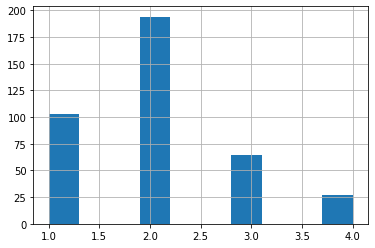

In [8]:
stud.studytime.hist()

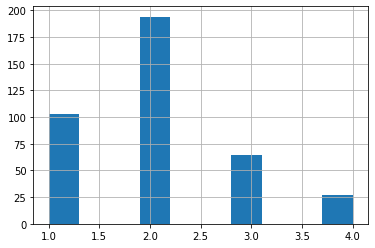

In [9]:
(stud['studytime, granular']*(-1/3)).hist()

С моей точки зрения studytime, granular избыточный параметр, дублирует параметр studytime. Поэтому удалим его

In [2]:
stud.drop(['studytime, granular'], axis = 1, inplace=True)

In [29]:
display(stud.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


## Как вытаскивать самое часто встречающееся значение - описание подхода

In [15]:
#нашла самое часто встречающееся значение где признаки заданы не числами 
stud.describe(include = ['object'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,378,368,350,376,359,378,364,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,295,261,314,133,197,137,250,335,219,200,195,300,356,305,240


In [17]:
stud.describe(include = ['object']).Pstatus.top

'T'

In [16]:
#нашла самое часто встречающееся значение где признаки заданы числами
stud.describe(include = [np.number])

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [98]:
stud.describe(include = [np.number]).m_edu

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: m_edu, dtype: float64

In [100]:
stud.describe(include = [np.number]).m_edu.max

<bound method Series.max of count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: m_edu, dtype: float64>

Поэтому где категориальное значение, но зашифровано цифрами (например Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)), я заменяла пропуски вручную, не нашла способа другого

### Рассмотрим, какие типы данных у столбцов и сколько пропусков:

In [14]:
stud.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   Pstatus     350 non-null    object 
 6   Medu        392 non-null    float64
 7   Fedu        371 non-null    float64
 8   Mjob        376 non-null    object 
 9   Fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

### На первый взгляд, в датасете 13 числовых столбцов
- age                  395 non-null    int64
-  Medu                 392 non-null    float64
- Fedu                 371 non-null    float64
- traveltime           367 non-null    float64
- studytime            388 non-null    float64
- failures             373 non-null    float64
- studytime, granular  388 non-null    float64
- famrel               368 non-null    float64
- freetime             384 non-null    float64
- goout                387 non-null    float64
- health               380 non-null    float64
- absences             383 non-null    float64
- score                389 non-null    float64

Эти столбцы числовые, но по факту только 2 из них реально числовые признаки: age и absences. score - целевая переменная. 

In [18]:
#вот так виднее сколько пропусков 
stud.isnull().sum()

school         0
sex            0
age            0
address       17
famsize       27
Pstatus       45
Medu           3
Fedu          24
Mjob          19
Fjob          36
reason        17
guardian      31
traveltime    28
studytime      7
failures      22
schoolsup      9
famsup        39
paid          40
activities    14
nursery       16
higher        20
internet      34
romantic      31
famrel        27
freetime      11
goout          8
health        15
absences      12
score          6
dtype: int64

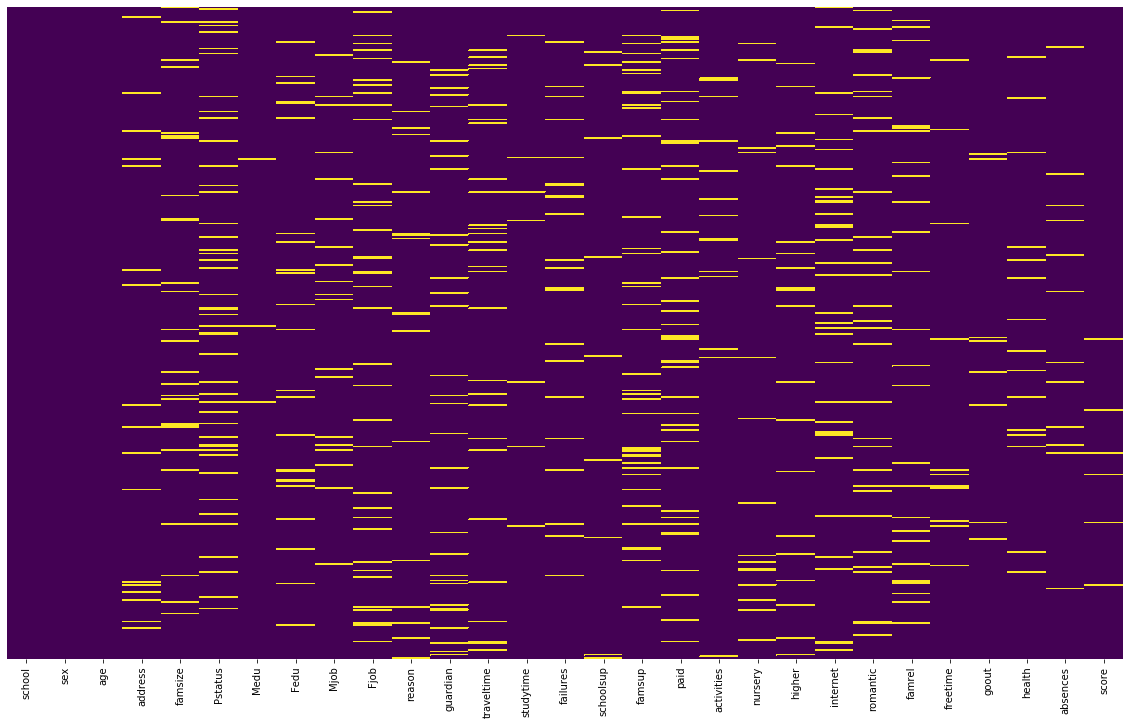

In [19]:
#а вот так еще виднее где пропуски
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(stud.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Прочитала статью https://gallery.azure.ai/Experiment/Methods-for-handling-missing-values-1 про избавление от пропусков, ктр прислала Анна Нохрина . Не все поняла, конечно, но попыталась проанализировать описанные в статье способы:

1) заменить на среднее. Подходит только тру числовым признакам, а таких в датасете немного. Категориальные признаки так заменять бесполезно stud.Medu.mean() получается 2.75, Исходя из условий описания принимает несколько целых значений. Замена на среднее ничего не даст 

2) заполнить медианным значением. Для категориальных признаков (у ктр значение от 0 до 4 например) подходит stud.Medu.median(), у ктр значение типа other stud.Mjob.median()- нет. 

3) интерполирование (interpolated estimate), насколько я поняла, используется для данных временных рядов (в статье так заполняют пропуски в стаже), в примере с учениками ничего похожего не нашла 

4) заполнение константой (в статье речь идет о доходах, ктр такие большие, что их нельзя раскрывать) - не очень понятно, что за константа. Не знаю, как применить к датасету про учеников 

5) imputation (не смогла перевести) - использовать для заполнения пропущенных значений у одних признаков другие признаки. (По стажу предсказывать возраст). В датасете про учеников пока не делала и пока не понимаю, какие признаки могут объяснить другие.

6) missing rank - нечто вроде счетчика. В статье есть данные с 1 по 11 и один пропуск, предлагается такой пропуск заменить 12. В нашем датасете не вижу таких примеров 

7) выделение отдельной категории "не определено". Выше обсуждали, что смысла нет выделять отдельную категорию для пропусков меньше 10%. Таких категорий с большими пропусками 3: Pstatus, famsup, paid  

8) Заменить пропуски на 0, если это числовые признаки. В датасете реально числовые признаки: age и absences, в первом пропусков нет, во втором как раз и попробую заменить на 0 (если нет данных, может и пропусков нет у ученика). 

9) заменить на 0 и создать индикатор True/False для пропущенных. Для одного числового признака absences не вижу смысла. А для целевой переменной попробую

10) Замена пропусков строкой типа "данные отсутствуют". В статье используется для категориального признака с большой вариативностью - контактное лицо. В нашем датасете я таких категориальных признаков не вижу. 

11) Замена пропусков строкой типа "данные отсутствуют" и создать индикатор True/False для пропущенных. В нашем датасете я таких категориальных признаков не вижу. 

12) удаление колонок с большим кол-вом пропущенных. Таких в датасете нет 

13) удаление строк с большим кол-вом пропущенных. Таких в датасете нет. Еще я бы добавила такой способ, как заполнение самым часто встречающимся значением - видела в тредах где-то. 

#### Выводы, ктр я сделала: 

буду применять для избавления от пропусков способы: 2) медиана, 5)  imputation, 7) новая категория "неопределено", 8 ) замена на 0 в числовых признаках, 9) заменить на 0 и создать индикатор True/False для пропущенных, 14) замена самым часто встречающимся значением. 

## Вывод
Только 3 первых признака school, sex, age без пропусков, все остальные - с пропусками

Теперь рассмотрим все 29 столбцов по отдельности

## school

school - 395 non-null    object  - пропусков нет
Посмотрим, нет ли ошибок в поле school в датасете

In [20]:
#уникальных значений 2 - MS middle school GP General Practice
stud.school.value_counts(dropna=False, normalize=True)

GP    0.883544
MS    0.116456
Name: school, dtype: float64

### Вывод
большая часть учащихся из датасета учатся в школе General Practice, около 88%. Всего учащиеся из 2х видов школ: middle school и General Practice, пропущенных данных нет

## sex 

sex - 395 non-null    object  - пропусков нет
Посмотрим, нет ли ошибок в поле sex в датасете

In [21]:
#уникальных значений 2 - F и M, других значений нет, значит в данных нет опечаток и пропусков
stud.sex.value_counts(dropna=False, normalize=True)

F    0.526582
M    0.473418
Name: sex, dtype: float64

### Вывод
Среди учащихся мужчин и женщин примерно поровну, с незначительным преобладанием женщин, пропущенных и ошибочных данных нет

## age
Этот столбец числовой и без пропусков. Поэтому посмотрим на его распределение:

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

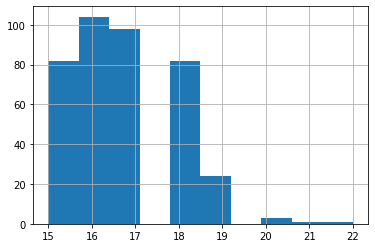

In [30]:
stud.age.hist()
stud.age.describe()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C69C1EB2C8>]],
      dtype=object)

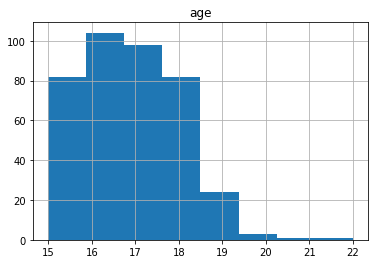

In [3]:
#так распределение выглядит красивее, без разрывов
stud.hist(column = 'age', bins = len(stud.age.value_counts()))

предположу, что есть выбросы

In [31]:
#рассмотрим процентное соотношение выпускников по возрасту
stud.age.value_counts(dropna=False, normalize=True)

16    0.263291
17    0.248101
18    0.207595
15    0.207595
19    0.060759
20    0.007595
22    0.002532
21    0.002532
Name: age, dtype: float64

Попробуем отфильтровать выбросы и воспользуемся формулой интерквартильного расстояния. Выбросом считаются такие значения, которые лежат вне рамок [Q1 -1.5IQR : Q3+1.5IQR], где IQR = percentile(75) - percentile(25).

Для начала, посмотрим на boxplot для признака age. Данный вид графика делит данные на 4 части. Та часть данных, которая отделена слева и справа двумя вертикальными линиями (находится внутри коробки) содержит 50% данных, так как левая линия обозначает первый квартиль (25-й перцентиль), а правая линия обозначает третий квартиль (75-й перцентиль). Большой вертикальной линией выделена медиана:

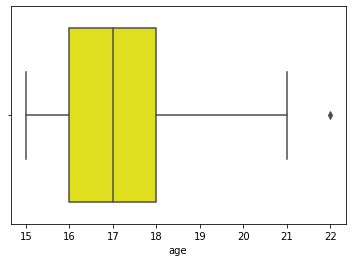

In [32]:
sns.boxplot(stud.age, color='yellow');

уже на графике видно, что есть по крайней мере 1 выброс

Метод межквартильного расстояния выделяет как выбросы все значения, находящиеся за пределами коробки. Посмотрим, сколько выбросов он найдет:

In [33]:
def outliers_iqr(ys):
    #находим квартили
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    #находим межквартильное расстояние
    iqr = quartile_3 - quartile_1
    #нижняя граница коробки
    lower_bound = quartile_1 - (iqr * 1.5)
    #верхняя граница коробки
    upper_bound = quartile_3 + (iqr * 1.5)
    #возращаем только те значения и их индексы, ктр больше upper_bound и меньше lower_bound
    return ys[((ys > upper_bound) | (ys < lower_bound))]

In [34]:
#применяем функцию к колонке age из stud
out = outliers_iqr(stud.age)

In [35]:
#индексы и их значения из колонки age
out

247    22
Name: age, dtype: int64

In [4]:
# мы подтвердили первоначальный вывод о том, что есть выброс, надо этот выброс удалить, фильтруем значения
stud = stud.loc[stud.age < 22]

In [5]:
#проверяем, что выброс удалился
stud.age.value_counts(dropna=False, normalize=True)

16    0.263959
17    0.248731
18    0.208122
15    0.208122
19    0.060914
20    0.007614
21    0.002538
Name: age, dtype: float64

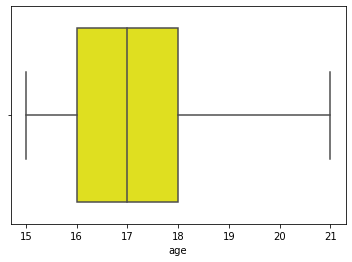

In [6]:
#снова рисуем boxplot и видим, что выбросов больше нет
sns.boxplot(stud.age, color='yellow');

поскольку age количественный признак,построю гистограмму распределения еще и с помощью библиотеки Seaborn и метода distplot

In [7]:
import warnings; warnings.simplefilter('ignore')

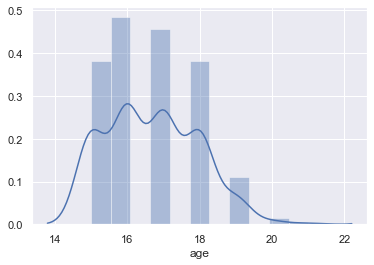

In [8]:
sns.set()
sns.distplot(stud['age'])

Seaborn позволяет разместить на одном графике гистограммы распределения двух признаков и показать связь между ними. Сделала для age и целевой переменной score

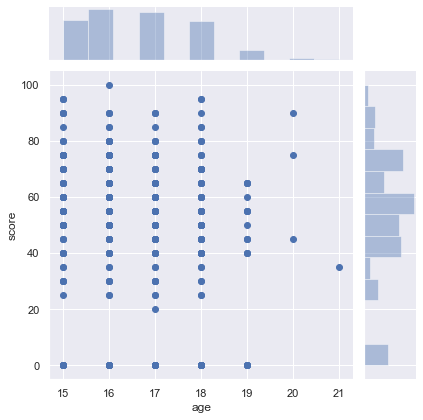

In [9]:
sns.jointplot(x = 'age', y = 'score', data = stud)

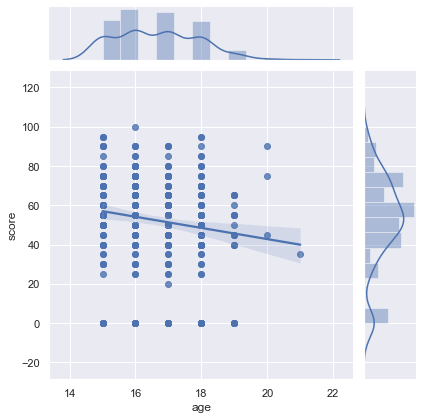

In [10]:
#добавим линию регресии
sns.jointplot(x = 'age', y = 'score', data = stud, kind = 'reg')

## Вывод
В колонке age не было пропусков, но был 1 выброс - 22 года, мы нашли этот выброс с помощью boxplot и формулы интерквартильного расстояния, строку с выбросом удалили. Примерно по одной четверти учащихся в возрасте 16 и 17 лет соответственно, примерно по одной пятой - в возрасте 18 и 15 лет. Учащиеся с возрастом 20 лет и 21 год составляют менее одного процента совокупно.  Распределение похоже на нормальное (колоколообразная форма графика), из регрессии на графике видно, что есть обратная зависимость между возратом и результатом экзамена

## address 

Есть пропуски.Посмотрим, нет ли ошибок в поле address тип адреса ученика ('U' - городской, 'R' - за городом)

In [39]:
#рассмотрим процентное соотношение выпускников по типу адреса (=месту жительства)
stud.address.value_counts(dropna=False, normalize=True)

U      0.746193
R      0.210660
NaN    0.043147
Name: address, dtype: float64

уникальных значений 2 - U и R, других значений нет, значит в данных нет опечаток, но есть пропуски

In [40]:
#сделаем замену пустых значений типа адреса на самое часто встречающееся значение - U
stud['address'] = stud['address'].fillna(stud.describe(include = ['object']).address.top)

In [41]:
#проверяем, что больше нет пропусков для типа адреса ученика
pd.DataFrame(stud.address.value_counts(dropna=False, normalize=True))

,address
U,0.78934
R,0.21066


## Вывод
В колонке address не было ошибочных данных, но было небольшое количество пропусков, которое мы заменили на самое часто встречающееся значение - U, преобладающее количество студентов (примерно 75%) живет в городе

## famsize

Есть пропуски. Посмотрим, нет ли ошибок в поле размер семьи('LE3' <= 3, 'GT3' >3)

In [42]:
#рассмотрим процентное соотношение выпускников по размеру семьи
stud.famsize.value_counts(dropna=False, normalize=True)

GT3    0.659898
LE3    0.271574
NaN    0.068528
Name: famsize, dtype: float64

уникальных значений 2 - GT3 и LE3, других значений нет, значит в данных нет опечаток, но есть пропуски

In [43]:
#сделаем замену пустых значений размера семьи на самое часто встречающееся значение - GT3
stud['famsize'] = stud['famsize'].fillna(stud.describe(include = ['object']).famsize.top)

In [44]:
#проверяем, что больше нет пропусков для размера семьи
pd.DataFrame(stud.famsize.value_counts(dropna=False, normalize=True))

,famsize
GT3,0.728426
LE3,0.271574


## Вывод
В колонке famsize не было ошибочных данных, но было небольшое количество пропусков, которое мы заменили на самое часто встречающееся значение - GT3, преобладающее количество студентов (примерно 66%) из семей, где больше 3х человек 

## Pstatus больше 10% пропусков

Есть пропуски. Посмотрим, нет ли ошибок в поле статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [45]:
#рассмотрим процентное соотношение выпускников по статусу совместного жилья родителей
stud.Pstatus.value_counts(dropna=False, normalize=True)

T      0.794416
NaN    0.114213
A      0.091371
Name: Pstatus, dtype: float64

Уникальных значений 2 - T и A, других значений нет, значит в данных нет опечаток, но есть пропуски. Предполагаю, что необходимо выделение отдельной категории N "не определено" - так как пропусков больше, чем 10%. 

## первый вариант замены - новая категория

In [46]:
#сделаем замену пустых значений размера семьи на новую категорию N - неопределено
stud['Pstatus'] = stud['Pstatus'].fillna('N')

## второй вариант замены - самое часто встречающееся значение 

In [5]:
#сделаем замену пустых значений размера семьи на самое часто встречающееся значение - T
stud['Pstatus'] = stud['Pstatus'].fillna(stud.describe(include = ['object']).Pstatus.top)

In [47]:
#проверяем, что больше нет пропусков для статусa совместного жилья родителей
pd.DataFrame(stud.Pstatus.value_counts(dropna=False, normalize=True))

,Pstatus
T,0.794416
N,0.114213
A,0.091371


## Вывод 
В колонке Pstatus не было ошибочных данных, но было некоторое количество пропусков (больше 10%), которое мы заменили на новую категорию "неопределено" - N, преобладающее количество студентов (примерно 90%) из семей, где родители живут вместе

## Medu 

Есть пропуски. Исходя из условий описания - принимает всего 4 значения. Проверим, есть ли выбросы

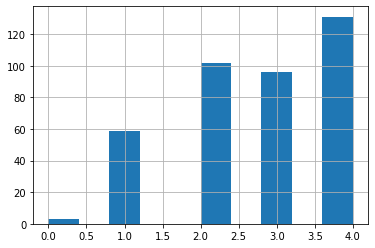

In [48]:
stud.Medu.hist()

In [49]:
#рассмотрим процентное соотношение студентов для каждого уровня образования матери
stud.Medu.value_counts(dropna=False, normalize=True)

4.0    0.332487
2.0    0.258883
3.0    0.243655
1.0    0.149746
0.0    0.007614
NaN    0.007614
Name: Medu, dtype: float64

Тоже само можно увидеть при построении boxplotов для категориальных признаков, что еще вернее. 

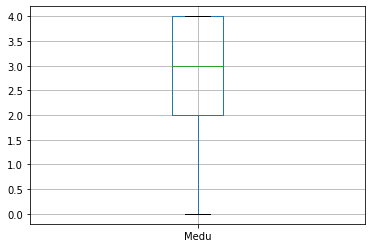

In [50]:
stud.boxplot(column='Medu')

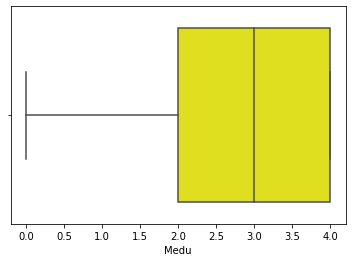

In [51]:
sns.boxplot(stud.Medu, color='yellow');

Выбросов нет 

## Первый вариант замены - на самое часто встречающееся значение

In [52]:
# По умолчанию заменяет все пропуски самым часто встречающимся значением 4
stud['Medu'] = stud['Medu'].fillna(4)

In [53]:
#проверяем, что больше нет пропусков 
stud.Medu.value_counts(dropna=False, normalize=True)

4.0    0.340102
2.0    0.258883
3.0    0.243655
1.0    0.149746
0.0    0.007614
Name: Medu, dtype: float64

## Второй вариант замены - на медиану

In [48]:
#а вот как выглядит медиана, можно делать замену не на самое частовстречающееся, а на медиану
stud.Medu.median()

3.0

# Вывод 
В колонке Medu не было выбросов, но были пропуски, которые мы заменили самым часто встречающимся значением. Больше трети матерей не имеют образования вообще, высшее образование меньше чем у 1%.

## Fedu

Есть пропуски. Исходя из условий описания - принимает всего 4 значения. Проверим, есть ли выбросы

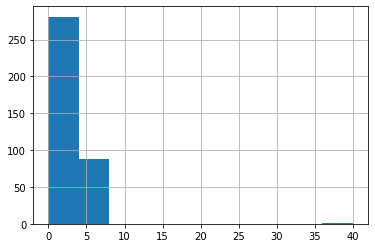

In [54]:
stud.Fedu.hist()

Смотрим какие выбросы - оказалось одно значение уплыло и стало равным 40.

In [55]:
#рассмотрим процентное соотношение выпускников по уровню образования отца
stud.Fedu.value_counts(dropna=False, normalize=True)

2.0     0.269036
3.0     0.243655
4.0     0.223350
1.0     0.195431
NaN     0.060914
0.0     0.005076
40.0    0.002538
Name: Fedu, dtype: float64

Тоже само можно увидеть при построении boxplotов для категориальных признаков, что еще вернее. Здесь хорошо виден выброс

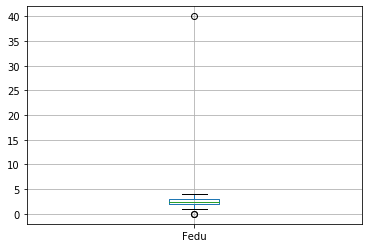

In [56]:
stud.boxplot(column='Fedu')

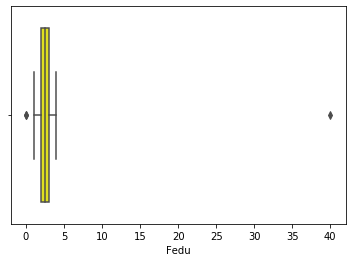

In [57]:
sns.boxplot(stud.Fedu, color='yellow');

Это нехорошо и мы можем догадываться: возможно это была "4", но с ошибочным нулем. Либо значение попало вообще из другого столбца и  ничего не значит и следует заменить его на самое частотное, например,  - 2 (судя по распределению известных значений) 

И если мы грубо заменим на единственный выброс, сможем увидеть нечто такое:

In [58]:
stud.loc[stud['Fedu'] == 40, 'Fedu'] = 4

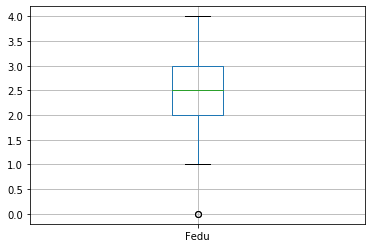

In [59]:
stud.boxplot(column = 'Fedu')

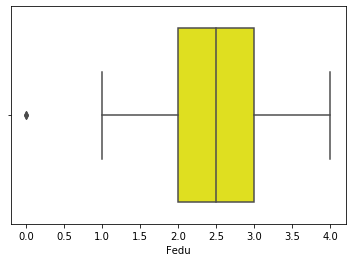

In [60]:
sns.boxplot(stud.Fedu, color='yellow');

После того, как убрала выброс в 40, выбросом стало значение 0 - то есть с высшим образованием. Но этот выброс убирать не буду, похоже, что в выборке вообще мало учеников, у ктр родители с образованием

Пропуски. Видим что из 395 нет информации о 24 строках. 5% процентов пропусков всего. Посмотрим на распределение признака и заменим на самое часто встречающееся значение  - 2 

In [61]:
# По умолчанию заменяет все пропуски значением 2
stud['Fedu'] = stud['Fedu'].fillna(2)

In [62]:
#заменяем наверняка ошибочное значение 40 на 2
stud['Fedu'] = stud['Fedu'].fillna(2).replace(40)

In [63]:
#проверяем, что больше нет пропусков 
pd.DataFrame(stud.Fedu.value_counts(dropna=False, normalize=True))

,Fedu
2.0,0.329949
3.0,0.243655
4.0,0.225888
1.0,0.195431
0.0,0.005076


In [49]:
#а вот как выглядит медиана, можно делать замену не на самое частовстречающееся, а на медиану. Но тут значения совпадают
stud.Fedu.median()

2.0

# Вывод 
В колонке Fedu был 1 выброс и были пропуски, которые мы заменили самым часто встречающимся значением (медианой). Высшее образование меньше чем у 1%, примерно по четверти тех, у кого нет образования, 5-9 классов и среднее специальное

## Mjob    

Работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое).Есть пропуски. Исходя из условий описания - принимает всего 5 значений. Проверим, есть ли выбросы

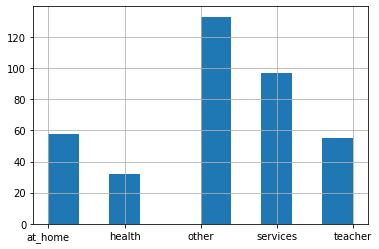

In [64]:
stud.Mjob.hist()

Для разнообразия для построения гистограммы распределения категориального признака воспользуемся методом countplot:

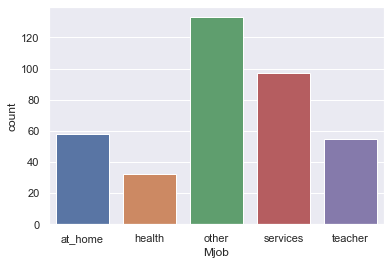

In [11]:
sns.countplot(x = 'Mjob', data = stud)

In [65]:
#рассмотрим процентное соотношение выпускников по работе матери
pd.DataFrame(stud.Mjob.value_counts(dropna=False, normalize=True))

,Mjob
other,0.337563
services,0.246193
at_home,0.147208
teacher,0.139594
health,0.081218
NaN,0.048223


уникальных значений 5, других значений нет, значит в данных нет опечаток, но есть пропуски

In [66]:
#сделаем замену пустых значений размера семьи на самое часто встречающееся значение - other
stud['Mjob'] = stud['Mjob'].fillna(stud.describe(include = ['object']).Mjob.top)

In [67]:
#проверяем, что больше нет пропусков 
pd.DataFrame(stud.Mjob.value_counts(dropna=False, normalize=True))

,Mjob
other,0.385787
services,0.246193
at_home,0.147208
teacher,0.139594
health,0.081218


## Вывод
В колонке Mjob не было ошибочных данных, но было небольшое количество пропусков, которое мы заменили на самое часто встречающееся значение - other, у больше чем 33% студентов работа матери относится к категории "другая"

## Fjob            

работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое) Исходя из условий описания - принимает всего 5 значений. Проверим, есть ли выбросы или ошибки

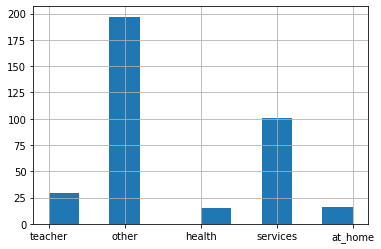

In [68]:
stud.Fjob.hist()

In [69]:
#рассмотрим процентное соотношение выпускников по работе отца
stud.Fjob.value_counts(dropna=False, normalize=True)

other       0.500000
services    0.256345
NaN         0.091371
teacher     0.073604
at_home     0.040609
health      0.038071
Name: Fjob, dtype: float64

уникальных значений 5, других значений нет, значит в данных нет опечаток, но есть пропуски

In [70]:
#сделаем замену пустых значений работы отца на самое часто встречающееся значение - other
stud['Fjob'] = stud['Fjob'].fillna(stud.describe(include = ['object']).Fjob.top)

In [71]:
#проверяем, что больше нет пропусков 
pd.DataFrame(stud.Fjob.value_counts(dropna=False, normalize=True))

,Fjob
other,0.591371
services,0.256345
teacher,0.073604
at_home,0.040609
health,0.038071


## Вывод
В колонке Fjob не было ошибочных данных, но было небольшое количество пропусков, которое мы заменили на самое часто встречающееся значение - other, у почти 50% студентов работа отца какая-то другая

##  reason

reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое) Исходя из условий описания - принимает всего 4 значения. Проверим, есть ли выбросы или ошибки

In [72]:
pd.DataFrame(stud.reason.value_counts(dropna=False, normalize=True))

,reason
course,0.347716
home,0.263959
reputation,0.261421
other,0.083756
NaN,0.043147


уникальных значений 4, других значений нет, значит в данных нет опечаток, но есть пропуски

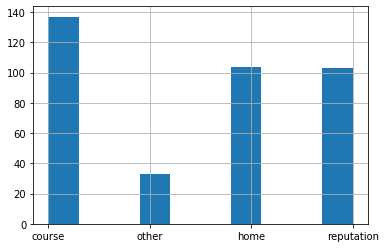

In [73]:
stud.reason.hist()

In [74]:
#сделаем замену пустых значений на самое часто встречающееся значение - course
stud['reason'] = stud['reason'].fillna(stud.describe(include = ['object']).reason.top)

In [75]:
#проверяем, что больше нет пропусков 
pd.DataFrame(stud.reason.value_counts(dropna=False, normalize=True))

,reason
course,0.390863
home,0.263959
reputation,0.261421
other,0.083756


## Вывод
В колонке reason не было ошибочных данных, но было небольшое количество пропусков, которое мы заменили на самое часто встречающееся значение - course, примерно 36% студентов выбрали школу из-за образовательной программы

## guardian

guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое) Исходя из условий описания - принимает всего 3 значения. Проверим, есть ли выбросы или ошибки

In [76]:
pd.DataFrame(stud.guardian.value_counts(dropna=False, normalize=True))

,guardian
mother,0.631980
father,0.218274
NaN,0.078680
other,0.071066


уникальных значений 3, других значений нет, значит в данных нет опечаток, но есть пропуски

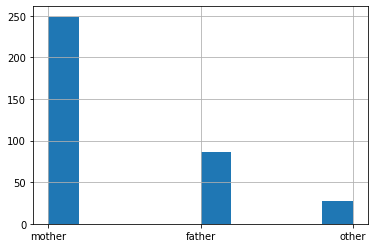

In [77]:
stud.guardian.hist()

In [78]:
#сделаем замену пустых значений на самое часто встречающееся значение - mother 
stud['guardian'] = stud['guardian'].fillna(stud.describe(include = ['object']).guardian.top)

In [79]:
#проверяем, что больше нет пропусков 
pd.DataFrame(stud.guardian.value_counts(dropna=False, normalize=True))

,guardian
mother,0.710660
father,0.218274
other,0.071066


## Вывод
В колонке guardian не было ошибочных данных, но было небольшое количество пропусков, которое мы заменили на самое часто встречающееся значение - mother, у почти 69% студентов опекуном является мать

## traveltime

traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.) Исходя из условий описания - принимает всего 4 значения. Проверим, есть ли выбросы или ошибки

In [80]:
pd.DataFrame(stud.traveltime.value_counts(dropna=False, normalize=True))

,traveltime
1.0,0.611675
2.0,0.243655
NaN,0.071066
3.0,0.055838
4.0,0.017766


уникальных значений 4, других значений нет, значит в данных нет опечаток, но есть пропуски

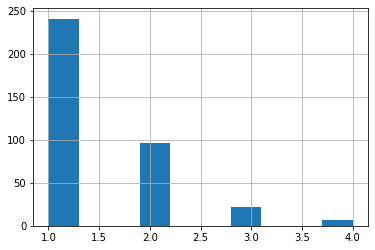

In [81]:
stud.traveltime.hist()

In [82]:
#рассмотрим процентное соотношение выпускников по времени в пути до школы
stud.traveltime.value_counts(normalize=True)

1.0    0.658470
2.0    0.262295
3.0    0.060109
4.0    0.019126
Name: traveltime, dtype: float64

In [83]:
#замена на самое часто встречающееся значение
stud['traveltime'] = stud['traveltime'].fillna(1)

In [84]:
#проверяем, что больше нет пропусков 
pd.DataFrame(stud.traveltime.value_counts(dropna=False, normalize=True))

,traveltime
1.0,0.682741
2.0,0.243655
3.0,0.055838
4.0,0.017766


In [51]:
#можно делать замену не на самое частовстречающееся значение, а на медиану. но тут медиана совпадает
stud.traveltime.median()

1.0

## Вывод
В колонке traveltime не было ошибочных данных, но было небольшое количество пропусков, которое мы заменили на самое часто встречающееся значение - 1 <15 мин, почти 66% студентов живут в 15 минутах от школы

## studytime

 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов) Исходя из условий описания - принимает всего 4 значения. Проверим, есть ли выбросы или ошибки

In [85]:
pd.DataFrame(stud.studytime.value_counts(dropna=False, normalize=True))

,studytime
2.0,0.492386
1.0,0.258883
3.0,0.162437
4.0,0.068528
NaN,0.017766


уникальных значений 4, других значений нет, значит в данных нет опечаток, но есть пропуски

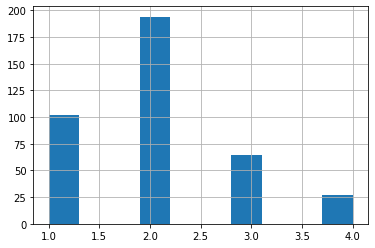

In [86]:
stud.studytime.hist()

In [87]:
#сделаем замену пустых значений на самое часто встречающееся значение 
stud['studytime'] = stud['studytime'].fillna(2)

In [88]:
#проверяем, что больше нет пропусков 
pd.DataFrame(stud.studytime.value_counts(dropna=False, normalize=True))

,studytime
2.0,0.510152
1.0,0.258883
3.0,0.162437
4.0,0.068528


In [52]:
#можно делать замену не на самое частовстречающееся значение, а на медиану. но тут медиана совпадает
stud.studytime.median()

2.0

## Вывод
В колонке studytime не было ошибочных данных, но было небольшое количество пропусков, которое мы заменили на самое часто встречающееся значение - 2 2-5 часов, 50% студентов тратят на учебу от 2 до 5 часов

## failures

failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4) Исходя из условий описания - принимает всего 4 значения. Проверим, есть ли выбросы или ошибки

In [89]:
pd.DataFrame(stud.failures.value_counts(dropna=False, normalize=True))

,failures
0.0,0.743655
1.0,0.124365
NaN,0.055838
2.0,0.040609
3.0,0.035533


уникальных значений 4, других значений нет, значит в данных нет опечаток, но есть пропуски

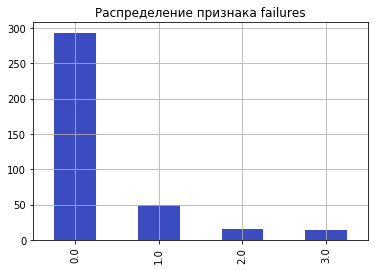

In [90]:
stud['failures'].value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'Распределение признака failures')

Это то, что называется "скрытый пропуск". Ну и при таком количестве брака, столбец отправляется в утиль.

In [91]:
#удаляем столбец
stud.drop(['failures'], axis=1, inplace=True)

In [92]:
#проверяем, что столбец удалился
stud.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,N,1.0,1.0,at_home,other,course,father,1.0,2.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


## Вывод
Из-за большого количества "скрытых пропусков" принято решение удалить столбец

## schoolsup

schoolsup — дополнительная образовательная поддержка (yes или no) Исходя из условий описания - принимает всего 2 значения. Проверим, есть ли выбросы или ошибки

In [93]:
pd.DataFrame(stud.schoolsup.value_counts(dropna=False, normalize=True))

,schoolsup
no,0.847716
yes,0.129442
NaN,0.022843


уникальных значений 2, других значений нет, значит в данных нет опечаток, но есть пропуски

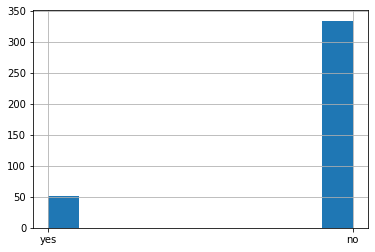

In [94]:
stud.schoolsup.hist()

Это то, что называется "скрытый пропуск", у 86% процентов учеников нет поддержки. Ну и при таком количестве брака, столбец отправляется в утиль.

In [95]:
#удаляем столбец
stud.drop(['schoolsup'], axis=1, inplace=True)

In [96]:
#проверяем, что столбец удалился
stud.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,N,1.0,1.0,at_home,other,course,father,1.0,2.0,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


## Вывод
Из-за большого количества "скрытых пропусков" принято решение удалить столбец

## famsup

famsup — семейная образовательная поддержка (yes или no) 39 пропусков Исходя из условий описания - принимает всего 2 значения. Проверим, есть ли выбросы или ошибки

In [97]:
pd.DataFrame(stud.famsup.value_counts(dropna=False, normalize=True))

,famsup
yes,0.555838
no,0.345178
NaN,0.098985


уникальных значений 2, других значений нет, значит в данных нет опечаток, но есть пропуски

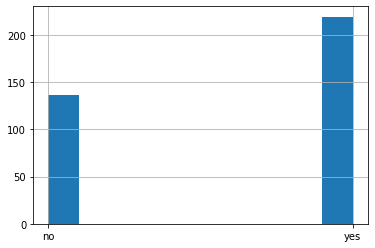

In [98]:
stud.famsup.hist()

Выделение отдельной категории N "не определено" - так как пропусков около 10%.

## первый вариант замены - новая категория

In [99]:
stud['famsup'] = stud['famsup'].fillna('N')

## второй вариант замены - самое часто встречающееся значение 

In [25]:
#сделаем замену пустых значений на самое часто встречающееся значение - yes
stud['famsup'] = stud['famsup'].fillna(stud.describe(include = ['object']).famsup.top)

In [100]:
#проверяем, что больше нет пропусков 
pd.DataFrame(stud.famsup.value_counts(dropna = False))

,famsup
yes,219
no,136
N,39


## Вывод 
В колонке famsup не было ошибочных данных, но было некоторое количество пропусков - около 10%, которые мы выделили в отдельную категорию N "не определено" , у более 61% студентов есть семейная образовательная поддержка

## paid

дополнительные платные занятия по математике (yes или no) 40 пропусков Исходя из условий описания - принимает всего 2 значения. Проверим, есть ли выбросы или ошибки

In [101]:
pd.DataFrame(stud.paid.value_counts(dropna=False, normalize=True))

,paid
no,0.505076
yes,0.393401
NaN,0.101523


уникальных значений 2, других значений нет, значит в данных нет опечаток, но есть пропуски

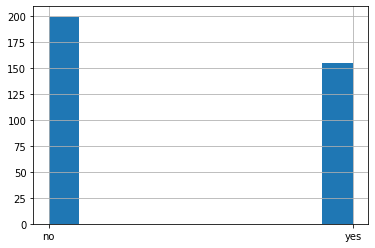

In [102]:
stud.paid.hist()

выделение отдельной категории N "не определено" - так как пропусков около 10%.

## первый вариант замены - новая категория

In [103]:
stud['paid'] = stud['paid'].fillna('N')

## второй вариант замены - самое часто встречающееся значение 

In [33]:
#сделаем замену пустых значений на самое часто встречающееся значение - no
stud['paid'] = stud['paid'].fillna(stud.describe(include = ['object']).paid.top)

In [84]:
#проверяем, что больше нет пропусков 
pd.DataFrame(stud.paid.value_counts(dropna=False, normalize=True))

,paid
no,0.505076
yes,0.393401
N,0.101523


## Вывод 
В колонке paid не было ошибочных данных, но было некоторое количество пропусков - около 10%, которые мы выделили в отдельную категорию N "не определено" , у более 56% студентов нет дополнительных платных занятий по математике

## activities

activities — дополнительные внеучебные занятия (yes или no) Исходя из условий описания - принимает всего 2 значения. Проверим, есть ли выбросы или ошибки

In [104]:
pd.DataFrame(stud.activities.value_counts(dropna=False, normalize=True))

,activities
yes,0.494924
no,0.469543
NaN,0.035533


уникальных значений 2, других значений нет, значит в данных нет опечаток, но есть пропуски

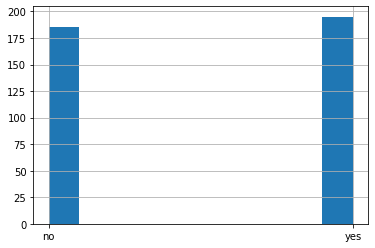

In [105]:
stud.activities.hist()

In [106]:
#сделаем замену пустых значений на самое часто встречающееся значение - yes
stud['activities'] = stud['activities'].fillna(stud.describe(include = ['object']).activities.top)

In [107]:
#проверяем, что больше нет пропусков 
pd.DataFrame(stud.activities.value_counts(dropna=False, normalize=True))

,activities
yes,0.530457
no,0.469543


## Вывод
В колонке activities не было ошибочных данных, но было небольшое количество пропусков, которое мы заменили на самое часто встречающееся значение - yes, студенты распределены примерно поровну: те, у кого есть дополнительные внеучебные занятия и те, у которых таких занятий нет

## nursery

nursery — посещал детский сад (yes или no) Исходя из условий описания - принимает всего 2 значения. Проверим, есть ли выбросы или ошибки

In [108]:
pd.DataFrame(stud.nursery.value_counts(dropna=False, normalize=True))

,nursery
yes,0.761421
no,0.197970
NaN,0.040609


уникальных значений 2, других значений нет, значит в данных нет опечаток, но есть пропуски

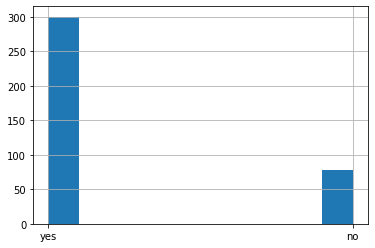

In [109]:
stud.nursery.hist()

In [110]:
#сделаем замену пустых значений на самое часто встречающееся значение - yes
stud['nursery'] = stud['nursery'].fillna(stud.describe(include = ['object']).activities.top)

In [111]:
#проверяем, что больше нет пропусков 
pd.DataFrame(stud.nursery.value_counts(dropna=False, normalize=True))

,nursery
yes,0.80203
no,0.19797


## Вывод
В колонке nursery не было ошибочных данных, но было небольшое количество пропусков, которое мы заменили на самое часто встречающееся значение - yes, примено 80% учащихся посещали детский сад

## higher

higher — хочет получить высшее образование (yes или no) Исходя из условий описания - принимает всего 2 значения. Проверим, есть ли выбросы или ошибки

In [112]:
pd.DataFrame(stud.higher.value_counts(dropna=False, normalize=True))

,higher
yes,0.903553
NaN,0.050761
no,0.045685


уникальных значений 2, других значений нет, значит в данных нет опечаток, но есть пропуски

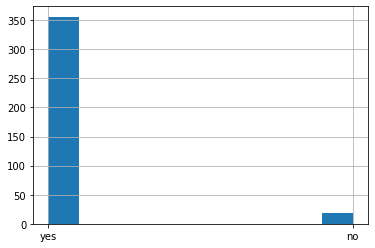

In [113]:
stud.higher.hist()

Поскольку больше 95% учащихся нацелены на получение высшего образования(скорей всего это верно), столбец стоит удалить, так как ответ почти везде положительный

In [114]:
#удаляем столбец
stud.drop(['higher'], axis=1, inplace=True)

In [115]:
#проверяем, что столбец удалился
stud.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,famsup,paid,activities,nursery,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,no,no,no,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,N,1.0,1.0,at_home,other,course,father,1.0,2.0,yes,no,no,no,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,no,N,no,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,yes,yes,no,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


## Вывод
Из-за преобладающего количества положительных ответов (больше 95%) принято решение удалить столбец

## internet

internet — наличие интернета дома (yes или no) Исходя из условий описания - принимает всего 2 значения. Проверим, есть ли выбросы или ошибки

In [116]:
pd.DataFrame(stud.internet.value_counts(dropna=False, normalize=True))

,internet
yes,0.771574
no,0.142132
NaN,0.086294


уникальных значений 2, других значений нет, значит в данных нет опечаток, но есть пропуски

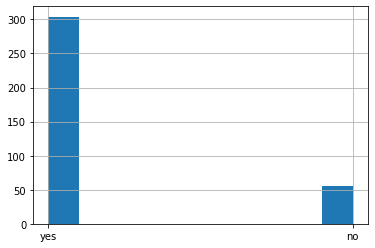

In [117]:
stud.internet.hist()

In [118]:
#сделаем замену пустых значений на самое часто встречающееся значение - yes
stud['internet'] = stud['internet'].fillna(stud.describe(include = ['object']).internet.top)

In [119]:
#проверяем, что больше нет пропусков 
pd.DataFrame(stud.internet.value_counts(dropna=False, normalize=True))

,internet
yes,0.857868
no,0.142132


## Вывод
В колонке internet не было ошибочных данных, но было небольшое количество пропусков, которое мы заменили на самое часто встречающееся значение - yes, примено у 77% учащихся есть дома интернет

## romantic

romantic — в романтических отношениях (yes или no). Исходя из условий описания - принимает всего 2 значения. Проверим, есть ли выбросы или ошибки

In [120]:
pd.DataFrame(stud.romantic.value_counts(dropna=False, normalize=True))

,romantic
no,0.609137
yes,0.312183
NaN,0.078680


уникальных значений 2, других значений нет, значит в данных нет опечаток, но есть пропуски

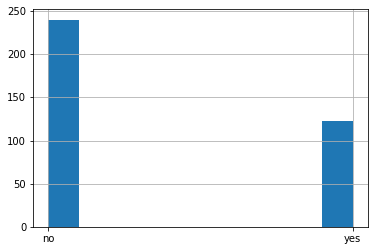

In [121]:
stud.romantic.hist()

In [122]:
#сделаем замену пустых значений на самое часто встречающееся значение - yes
stud['romantic'] = stud['romantic'].fillna(stud.describe(include = ['object']).romantic.top)

In [123]:
#проверяем, что больше нет пропусков 
pd.DataFrame(stud.romantic.value_counts(dropna=False, normalize=True))

,romantic
no,0.687817
yes,0.312183


## Вывод
В колонке romantic не было ошибочных данных, но было небольшое количество пропусков, которое мы заменили на самое часто встречающееся значение - no, примено у 60% учащихся нет романтических отношений

## famrel

famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо) Есть пропуски. Исходя из условий описания - принимает всего 5 значений. Проверим, есть ли выбросы

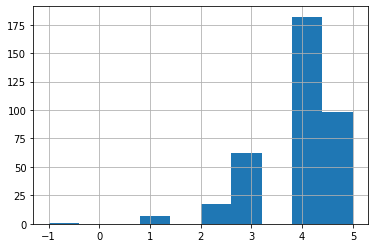

In [124]:
stud.famrel.hist()

Смотрим какие выбросы - сразу видно одно значение уплыло и стало равным отрицательным

In [125]:
#рассмотрим процентное соотношение выпускников по качеству семейных отношений
stud.famrel.value_counts(dropna=False, normalize=True)

 4.0    0.461929
 5.0    0.248731
 3.0    0.157360
 NaN    0.068528
 2.0    0.043147
 1.0    0.017766
-1.0    0.002538
Name: famrel, dtype: float64

Тоже само можно увидеть при построении boxplotов для категориальных признаков, что еще вернее. Здесь хорошо виден выброс

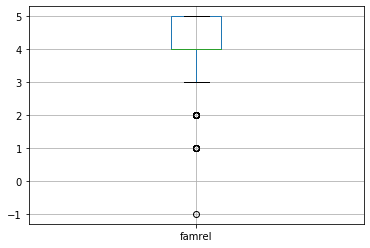

In [126]:
stud.boxplot(column='famrel')

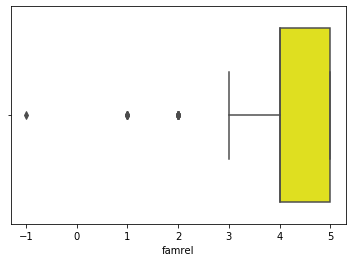

In [127]:
sns.boxplot(stud.famrel, color='yellow');

Видим несколько выбросов. Один из них точно ошибочный - 1, так как признак не может иметь по условию отрицательных значений. Предположим, что это опечатка и заменим -1 на 1

In [128]:
stud.loc[stud['famrel'] == -1, 'famrel'] = 1

снова построим boxplot

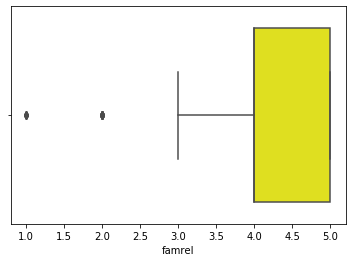

In [129]:
sns.boxplot(stud.famrel, color='yellow');

и все равно значения 1 и 2 (очень плохие и плохие отношения в семье) выглядят как выбросы. Но мне кажется неправильным их удалять, вдруг они будут коррелировать с плохой успеваемостью или вообще нулевым результатом экзамена

In [130]:
#посчитаем медиану
stud.famrel.median()

4.0

медиана и самое часто встречающееся значение совпадают

In [131]:
#сделаем замену пустых значений на самое часто встречающееся значение (=медиана) - 4
stud['famrel'] = stud['famrel'].fillna(4)

In [132]:
#проверяем, что больше нет пропусков 
pd.DataFrame(stud.famrel.value_counts(dropna=False, normalize=True))

,famrel
4.0,0.530457
5.0,0.248731
3.0,0.157360
2.0,0.043147
1.0,0.020305


## Вывод
В колонке famrel было несколько выбросов и были пропуски, которые мы заменили самым часто встречающимся значением (медианой). Примерно у половины учеников отношения в семье хорошие

## freetime

freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого) Есть пропуски. Исходя из условий описания - принимает всего 5 значений. Проверим, есть ли выбросы

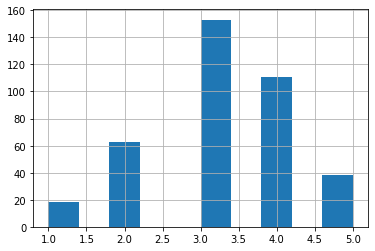

In [133]:
stud.freetime.hist()

In [134]:
#рассмотрим процентное соотношение выпускников по количеству свободного времени
stud.freetime.value_counts(dropna=False, normalize=True)

3.0    0.388325
4.0    0.281726
2.0    0.159898
5.0    0.096447
1.0    0.045685
NaN    0.027919
Name: freetime, dtype: float64

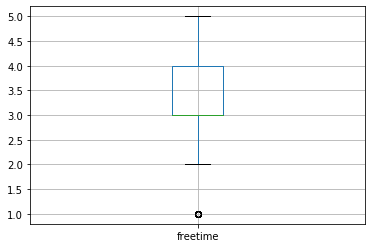

In [135]:
stud.boxplot(column='freetime')

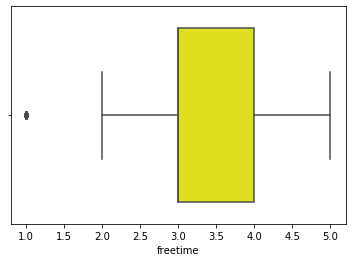

In [136]:
sns.boxplot(stud.freetime, color='yellow');

In [137]:
stud.freetime.value_counts(dropna=False)

3.0    153
4.0    111
2.0     63
5.0     38
1.0     18
NaN     11
Name: freetime, dtype: int64

Значение 1 (очень мало свободного времени) выглядит как выбросы. Но мне кажется неправильным их удалять, вдруг они будут коррелировать с хорошей успеваемостью - много свободного времени - много учится.

In [138]:
stud.freetime.median()

3.0

медиана и самое часто встречающееся значение совпадают

In [139]:
#сделаем замену пустых значений на самое часто встречающееся значение (=медиана) - 3
stud['freetime'] = stud['freetime'].fillna(3)

In [140]:
#проверяем, что больше нет пропусков 
pd.DataFrame(stud.freetime.value_counts(dropna=False, normalize=True))

,freetime
3.0,0.416244
4.0,0.281726
2.0,0.159898
5.0,0.096447
1.0,0.045685


## Вывод
В колонке freetime было несколько выбросов и были пропуски. Пропуски заменила самым часто встречающимся значением (медианой), выбросы решила не удалять. У большей части учеников свободное время есть в достаточном количестве.

## goout

goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много). Есть пропуски. Исходя из условий описания - принимает всего 5 значений. Проверим, есть ли выбросы

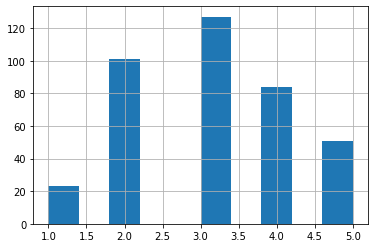

In [141]:
stud.goout.hist()

In [142]:
#рассмотрим процентное соотношение выпускников по проведению времени с друзьями
stud.goout.value_counts(dropna=False, normalize=True)

3.0    0.322335
2.0    0.256345
4.0    0.213198
5.0    0.129442
1.0    0.058376
NaN    0.020305
Name: goout, dtype: float64

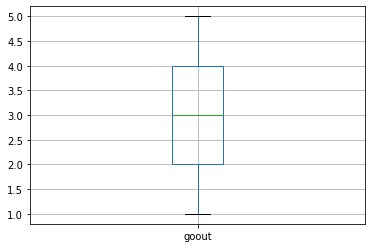

In [143]:
stud.boxplot(column='goout')

In [144]:
stud.goout.median()

3.0

медиана и самое часто встречающееся значение совпадают

In [145]:
#сделаем замену пустых значений на самое часто встречающееся значение (=медиана) - 3
stud['goout'] = stud['goout'].fillna(3)

In [146]:
#проверяем, что больше нет пропусков 
pd.DataFrame(stud.goout.value_counts(dropna=False, normalize=True))

,goout
3.0,0.342640
2.0,0.256345
4.0,0.213198
5.0,0.129442
1.0,0.058376


## Вывод
В колонке freetime не было выбросов, но были пропуски, которые заменила самым часто встречающимся значением (медианой).Большая часть учеников достаточно часто выходит куда-то с друзьями

## health

health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо) Есть пропуски. Исходя из условий описания - принимает всего 5 значений. Проверим, есть ли выбросы

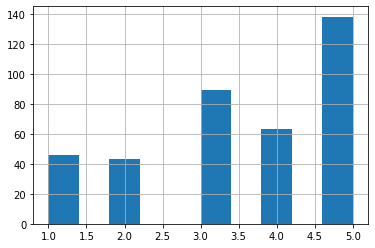

In [147]:
stud.health.hist()

In [148]:
#рассмотрим процентное соотношение выпускников по состоянию здоровья
stud.health.value_counts(dropna=False, normalize=True)

5.0    0.350254
3.0    0.225888
4.0    0.159898
1.0    0.116751
2.0    0.109137
NaN    0.038071
Name: health, dtype: float64

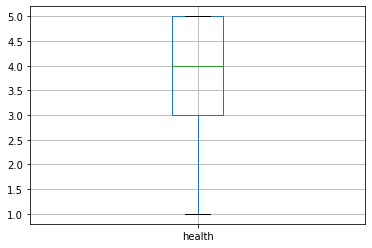

In [149]:
stud.boxplot(column='health')

In [150]:
stud.health.median()

4.0

## Первый вариант замены - на самое часто встречающееся значение

In [151]:
# По умолчанию заменяет все пропуски самым часто встречающимся значением 5
stud['health'] = stud['health'].fillna(5)

In [152]:
#проверяем, что больше нет пропусков 
stud.health.value_counts(dropna=False, normalize=True)

5.0    0.388325
3.0    0.225888
4.0    0.159898
1.0    0.116751
2.0    0.109137
Name: health, dtype: float64

## Второй вариант замены - на медиану

## Вывод 
В колонке health не было выбросов, но были пропуски, которые мы заменили самым часто встречающимся значением. У большей части учащихся со здоровьем все хорошо

## absences

absences — количество пропущенных занятий, есть пропуски. Заменим пропуски на 0, так как это числовой признак. Возможно, если нет данных, может и пропусков нет у ученика. Посмотрим, нет ли ошибок

In [153]:
pd.DataFrame(stud.absences.value_counts(dropna=False, normalize=True))

,absences
0.0,0.281726
2.0,0.152284
4.0,0.134518
6.0,0.078680
8.0,0.053299
10.0,0.043147
12.0,0.030457
NaN,0.030457
14.0,0.030457
3.0,0.020305


In [154]:
#заменим все пропуски на 0
stud['absences'] = stud['absences'].fillna(0)

Этот столбец числовой и теперь без пропусков. Поэтому посмотрим на его распределение:

count    394.000000
mean       7.035533
std       23.163953
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

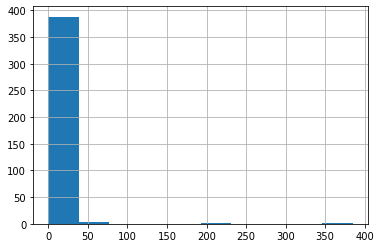

In [155]:
stud.absences.hist()
stud.absences.describe()

Попробуем отфильтровать выбросы и воспользуемся формулой интерквартильного расстояния. Выбросом считаются такие значения, которые лежат вне рамок [Q1 -1.5IQR : Q3+1.5IQR], где IQR = percentile(75) - percentile(25).

Для начала, посмотрим на boxplot для признака age. Данный вид графика делит данные на 4 части. Та часть данных, которая отделена слева и справа двумя вертикальными линиями (находится внутри коробки) содержит 50% данных, так как левая линия обозначает первый квартиль (25-й перцентиль), а правая линия обозначает третий квартиль (75-й перцентиль). Большой вертикальной линией выделена медиана:

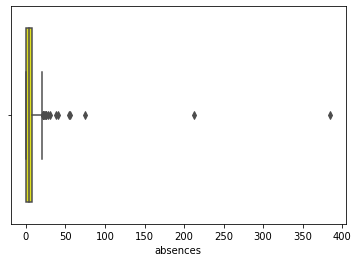

In [156]:
sns.boxplot(stud.absences, color='yellow');

уже на графике видно, что есть несколько выбросов

Метод межквартильного расстояния выделяет как выбросы все значения, находящиеся за пределами коробки. Посмотрим, сколько выбросов он найдет

In [157]:
#применяем функцию outliers_iqr (я ее сделала раньше) к колонке absences из stud
out1 = outliers_iqr(stud.absences)

In [158]:
#кол-во выбросов
len(out1)

17

In [159]:
out1

40      25.0
74      54.0
103     26.0
183     56.0
198     24.0
205     28.0
216     22.0
222    385.0
260     21.0
276     75.0
277     22.0
280     30.0
307     38.0
313     22.0
315     40.0
320     23.0
390    212.0
Name: absences, dtype: float64

In [160]:
#находим квартили
quartile_1, quartile_3 = np.percentile(stud.absences, [25, 75])
#находим межквартильное расстояние
iqr = quartile_3 - quartile_1
#нижняя граница коробки
lower_bound = quartile_1 - (iqr * 1.5)
#верхняя граница коробки
upper_bound = quartile_3 + (iqr * 1.5)

#Этот способ позволил нам отобрать экстремально низкие и экстремально высокие оценки. Отфильтруем данные:
stud = stud.loc[stud.absences.between(lower_bound, upper_bound)]

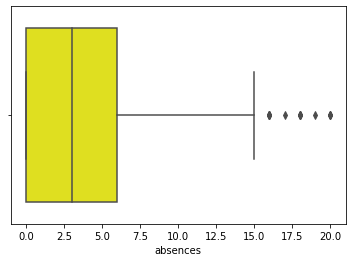

In [161]:
#снова рисуем boxplot и видим, что все еще есть выбросы (хотя 17 выбросов уже удалили)
sns.boxplot(stud.absences, color='yellow');

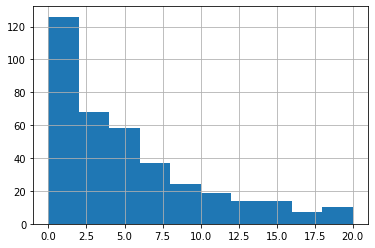

In [162]:
#посмотрим на распределение после удаления выбросов
stud.absences.hist()

In [163]:
#снова применяем функцию к колонке absences из stud
out2 = outliers_iqr(stud.absences)

In [164]:
#снова многовато выбросов, но я пока не знаю, что с ними делать - оставить или снова удалить
len(out2)

17

In [165]:
out2

18     16.0
29     16.0
89     18.0
118    20.0
123    18.0
133    16.0
165    16.0
203    18.0
225    16.0
234    18.0
237    20.0
281    19.0
304    20.0
309    18.0
311    20.0
335    16.0
379    17.0
Name: absences, dtype: float64

In [166]:
#рассмотрим процентное соотношение выпускников по наличию пропусков
stud.absences.value_counts(normalize=True)

0.0     0.326260
2.0     0.159151
4.0     0.140584
6.0     0.082228
8.0     0.055703
10.0    0.045093
12.0    0.031830
14.0    0.031830
3.0     0.021220
16.0    0.015915
7.0     0.015915
18.0    0.013263
5.0     0.013263
20.0    0.010610
1.0     0.007958
9.0     0.007958
11.0    0.005305
13.0    0.005305
15.0    0.005305
19.0    0.002653
17.0    0.002653
Name: absences, dtype: float64

## Вывод
В колонке absences были пропуски (заменены на ноль, так как я предположила, что отсутствие значения означает отсутствие пропусков), было несколько выбросов, нашла этот выброс с помощью boxplot и формулы интерквартильного расстояния, строки с выбросами удалила. Примерно треть учащихся вообще занятия не пропускала (но это значение получано после замены пустых значений на 0). Распределение на нормальное не похоже (не колоколообразная форма графика) даже после удаления выбросов. И да, выбросы даже после фильтрации остались, не знаю как с ними поступить, поэтому оставила

## score
score — важный столбец, так как именно баллы по госэкзамену по математике будет учиться предсказывать будущая модель.  Посмотрим, нет ли явных ошибок

In [167]:
stud.score.value_counts(dropna=False, normalize=True)

50.0     0.143236
55.0     0.111406
0.0      0.098143
75.0     0.087533
60.0     0.082228
65.0     0.079576
70.0     0.071618
40.0     0.071618
45.0     0.061008
80.0     0.042440
30.0     0.037135
90.0     0.026525
35.0     0.023873
25.0     0.018568
NaN      0.015915
85.0     0.013263
95.0     0.013263
100.0    0.002653
Name: score, dtype: float64

Буду использовать следующий метод заполнения пропусков: заменить на 0 и создать индикатор True/False для пропущенных. Заполнение пропуска 0 подразумевает что не стали указывать этот самый 0, а не то, что 0 это маркировка незаполненных значений. Для этого делают допколонку True/False чтобы понимать где реальная оценка 0, а где догадка - замена пропуска на 0 (возможно прогул, выгнали с экзамена, блак некорректно заполнен и т.д.) 

In [ ]:
#создаем новую колонку score_indicator
cols = ['score']
df = stud[cols].isnull().astype(int).add_suffix('_indicator')
print (df)

In [ ]:
# прикрепляем новую колонку к датафрейму
stud = stud.join(df)

In [ ]:
#проверяем, что где 1 в колонке score_indicator там в колонке score - Nan
stud[stud.score_indicator == 1]

In [168]:
#заменим все пропуски на 0
stud['score'] = stud['score'].fillna(0)

In [ ]:
#снова проверяем, что где 1 в колонке score_indicator там в колонке score уже не Nan, а 0
stud[stud.score_indicator == 1]

Посмотрим на распределение баллов. Этот столбец числовой и теперь без пропусков

count    377.000000
mean      51.432361
std       23.827646
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

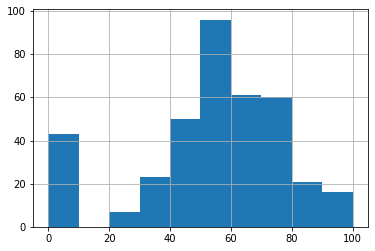

In [169]:
stud.score.hist()
stud.score.describe()

У нашего распределения есть проблема — есть перепад. На практике часто в таких случаях логорифмируют переменную, чтобы уменьшить перепады и сгладить хвост.

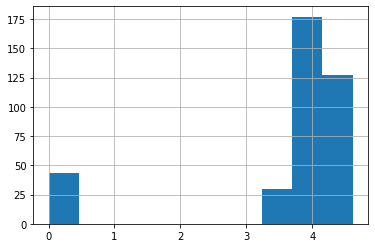

In [170]:
stud['score'].apply(lambda w: np.log(w + 1)).hist();


Видим, что в нашем случае логарифмирование не помогло

Как мы видим, большинство оценок распределены между 0 и 100 (медиана 55, 25-й перцентиль 40 и 75-й — 70), что позволяет сделать два предположения:

- Скорее всего была использована 100балльная шкала оценивания
- В данных нет выбросов.
 Давайте это проверим:

Для начала, посмотрим на boxplot для признака score. Данный вид графика делит данные на 4 части. Та часть данных, которая отделена слева и справа двумя вертикальными линиями (находится внутри коробки) содержит 50% данных, так как левая линия обозначает первый квартиль (25-й перцентиль), а правая линия обозначает третий квартиль (75-й перцентиль). Большой вертикальной линией выделена медиана:

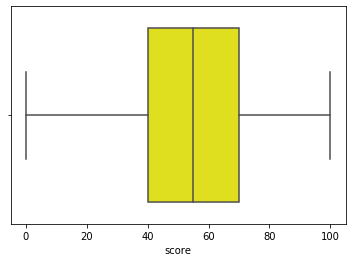

In [171]:
sns.boxplot(stud.score, color='yellow');

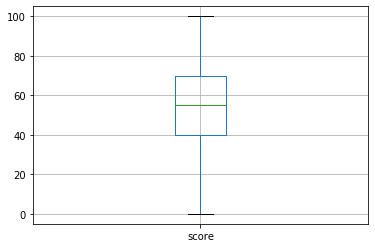

In [172]:
stud.boxplot(column = 'score')

# Корреляционный  анализ 
Выясним, какие столбцы коррелируют с баллами по госэкзамену по математике. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 

Корреляции рассмотрим для всех столбцов, числовых по факту 3: признаки absences и age, и целевая переменная score

Для быстрого построения графиков зависимости переменных можно воспользоваться функцией pairplot из модуля seaborn:

In [173]:
#делаем матрицу для корреляции
stud_for_corr = stud.loc[:, ['age', 'absences', 'score']]

In [174]:
#смотрим, что получилось
stud_for_corr.head()

,age,absences,score
0,18,6.0,30.0
1,17,4.0,30.0
2,15,10.0,50.0
3,15,2.0,75.0
4,16,4.0,50.0


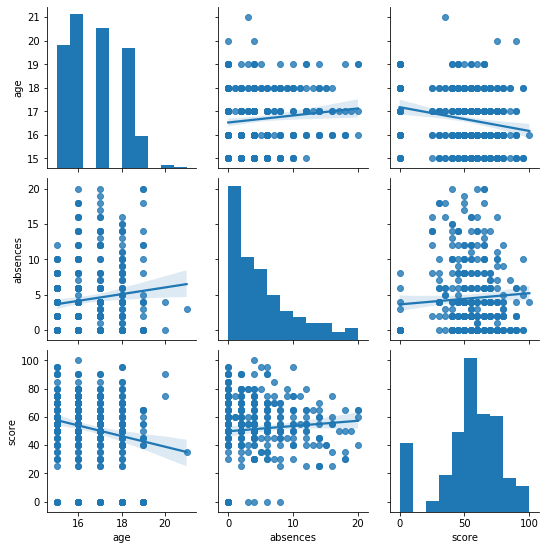

In [175]:
sns.pairplot(stud_for_corr, kind = 'reg')

Используем для наглядности матрицу корреляций:

In [176]:
stud_for_corr.corr()

,age,absences,score
age,1.000000,0.118910,-0.194911
absences,0.118910,1.000000,0.076848
score,-0.194911,0.076848,1.000000


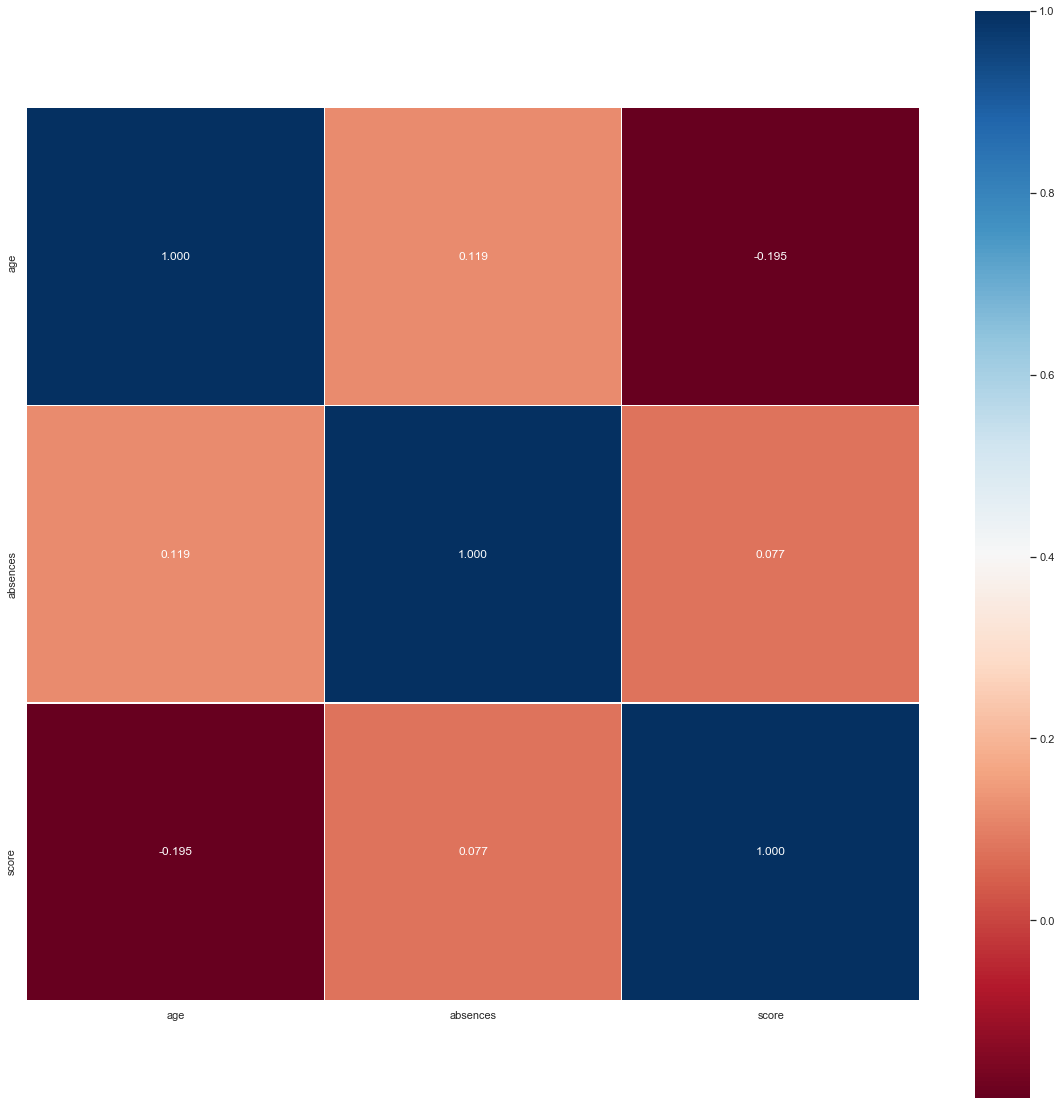

In [177]:
#строим тепловую карту (хотя наверно тут это не за чем, но пусть будет)
sns.set(font_scale=1)
plt.subplots(figsize=(20, 20))
sns.heatmap(stud_for_corr.corr(), square=True,
              annot=True, fmt=".3f", linewidths=0.1, cmap="RdBu")

Для корреляции есть пороги вроде: <0.3 слабая,  0.3-0.7 умеренная, >0.7 сильная.

Оба значения (age и absense) слабо коррелируют с целевой переменной score. Странно, что у признака absense слабо положительная корреляция с целевой переменной, хотя должно быть наоборот, чем больше ученик прогулял, тем ниже его оценка. Слабая обратная корреляция признака age и баллов возможно объясняется тем, что ученики более старшего возраста оставались учиться на второй год и такие ученики меньше мотивированы учиться

Не стоит доверять корреляционному анализу слепо и выкидывать признаки из модели. Нельзя ни в коем случае смотреть на то, как скоррелированы признаки и целевая переменная: если сильно коррелирует, то признак значимый - оставляем, если слабо - удаляем. Вы не можете просто так удалять данные, если коэфициент корреляции низкий.
Если признак1 влияет в два раза слабее, чем признак2 это не повод выбрасывать признак1, он все равно значимый для модели.
Для определения этого и существует t-test, и основанная на нем p-value для тестирования нулевой гипотезы, что признак1 не является значимым. Только прогнав регрессию можно выбрасывать переменные.

In [180]:
#добавила параметр nan_policy='omit'
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score'], nan_policy='omit').pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [181]:
for col in ['age', 'absences']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки age


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


#### Судя по полученному результату, признак age влияет на целевую переменную score.  Признак absences не влияет, поэтому можем его удалить

# Анализ номинативных переменных
Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. Однако можно посмотреть, различаются ли распределения рейтинга в зависимости от значения этих переменных. Это можно сделать, например, с помощью box-plot или KDE-plot (график показывает плотность распределения переменных).

Большая часть признаков номинативные
Так как уникальных значений в столбцах немного, будем брать в рассмотрение все

In [184]:
#столько было столбцов изначально
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [182]:
#столько столбцов стало после удаления, для boxplot надо выкинуть числовые age и absences и целевой score
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'famsup', 'paid', 'activities', 'nursery', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [183]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index)],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

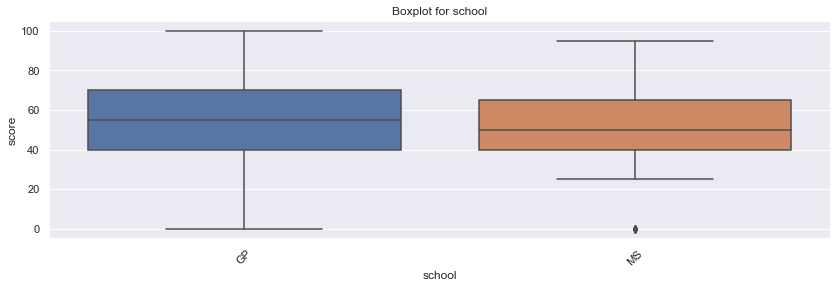

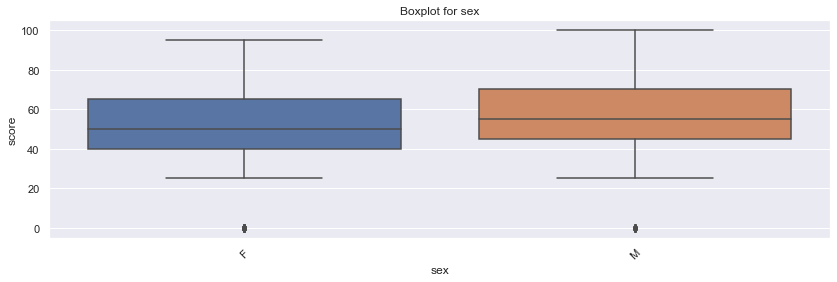

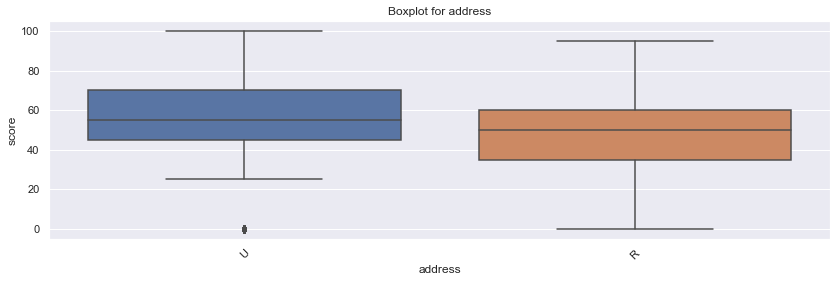

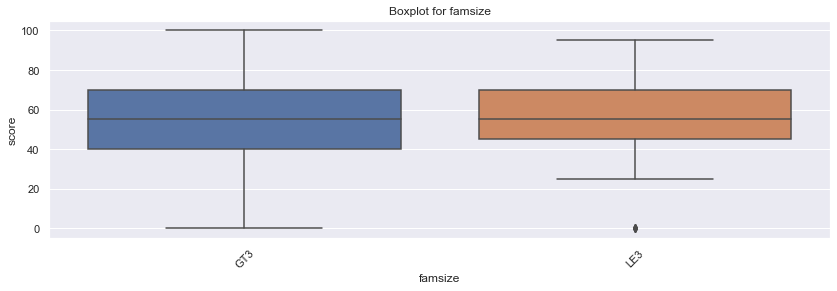

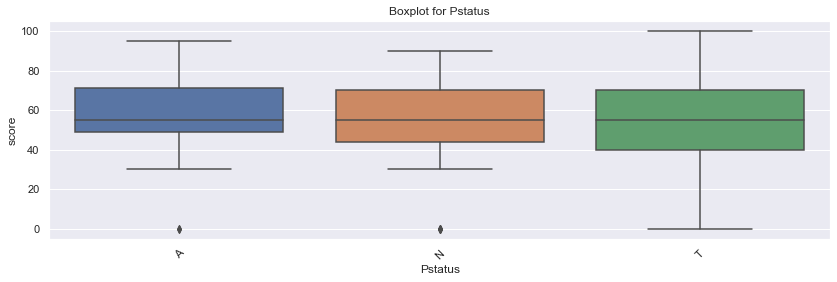

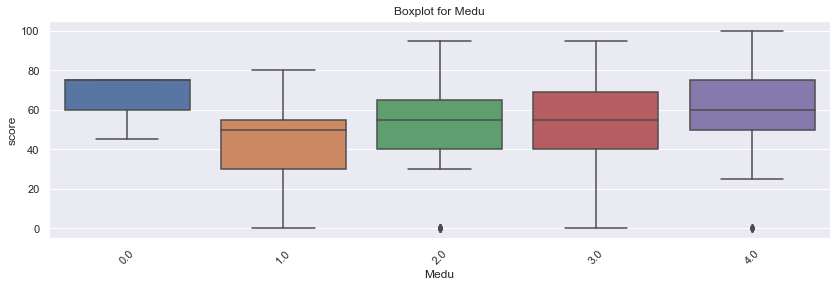

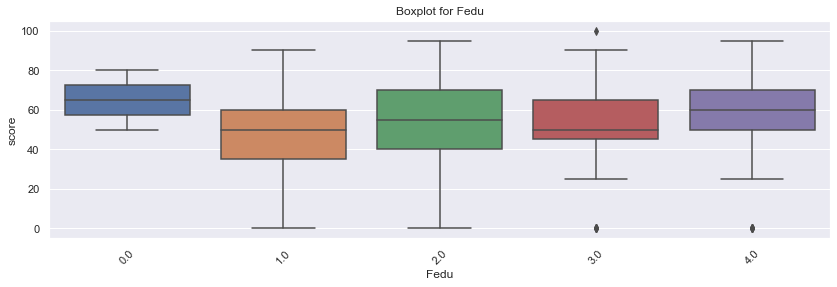

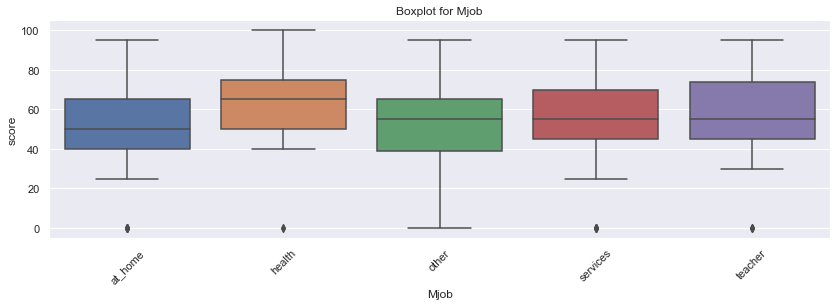

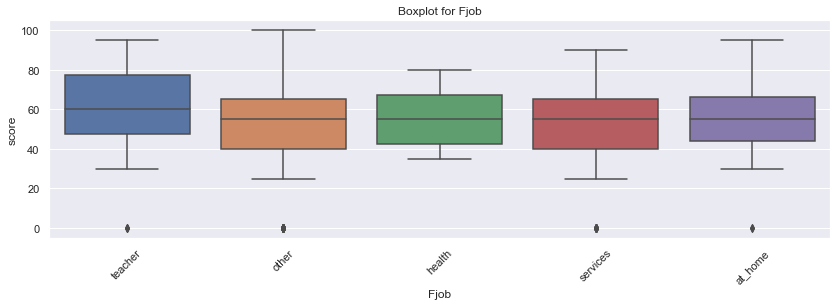

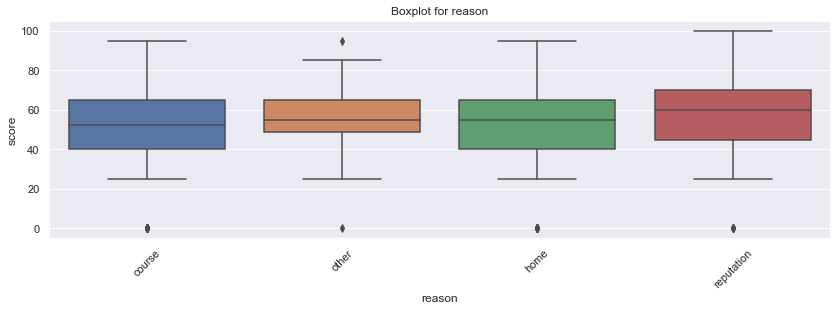

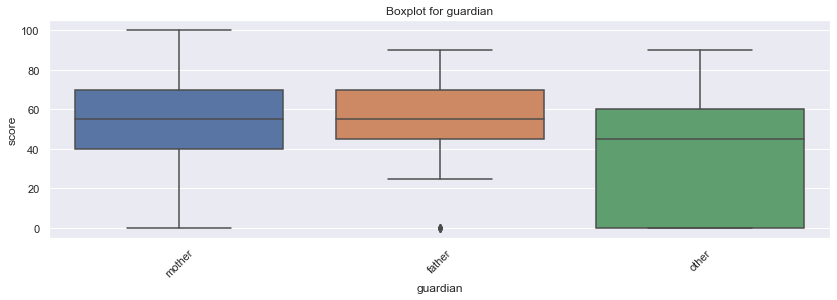

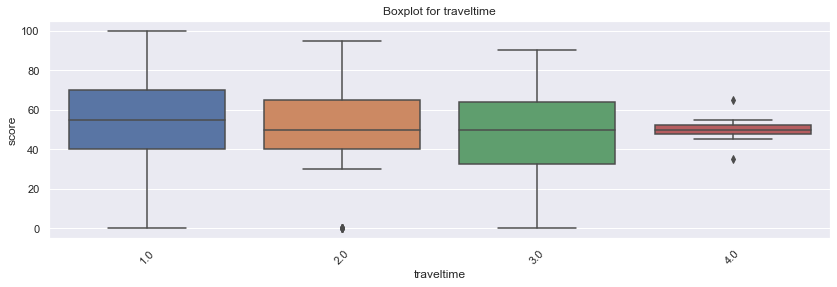

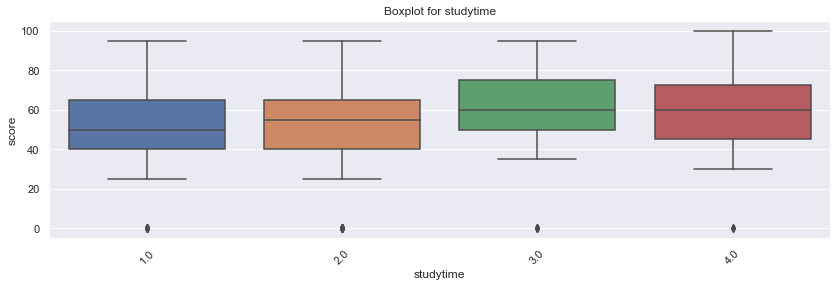

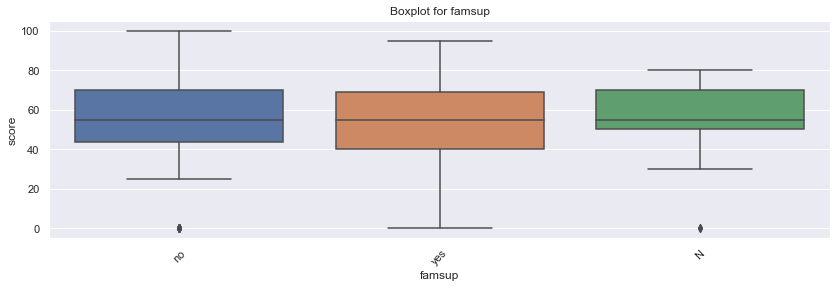

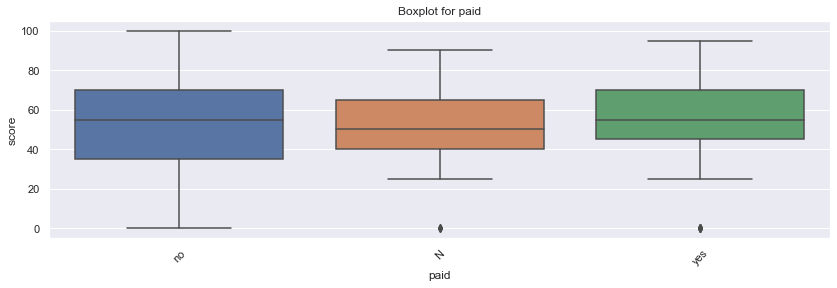

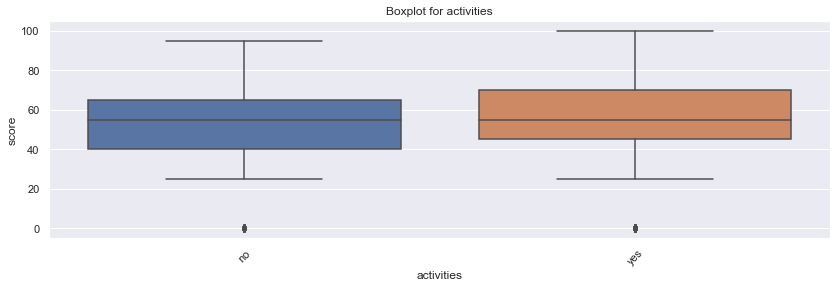

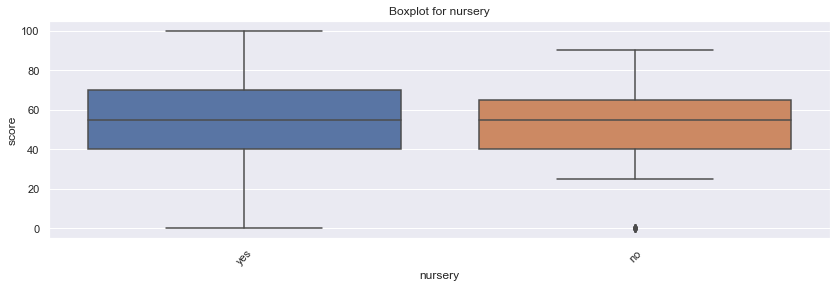

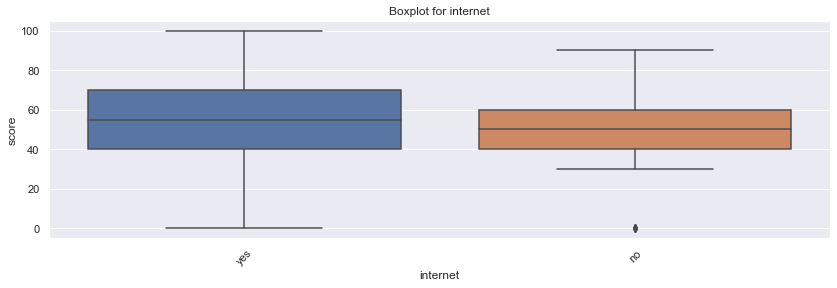

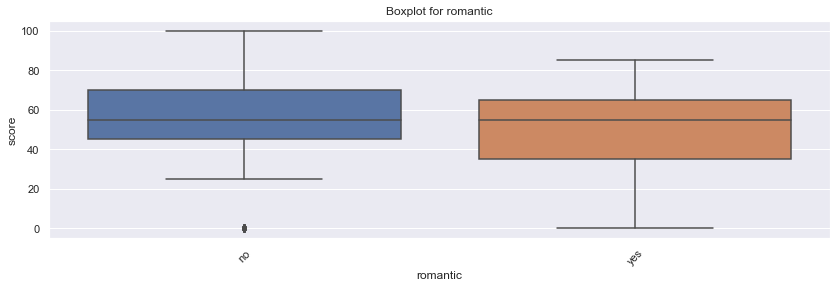

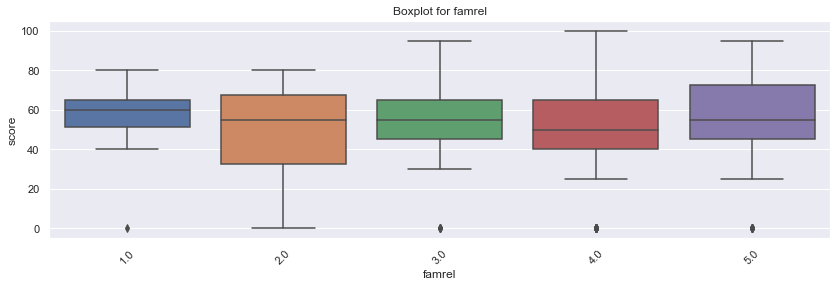

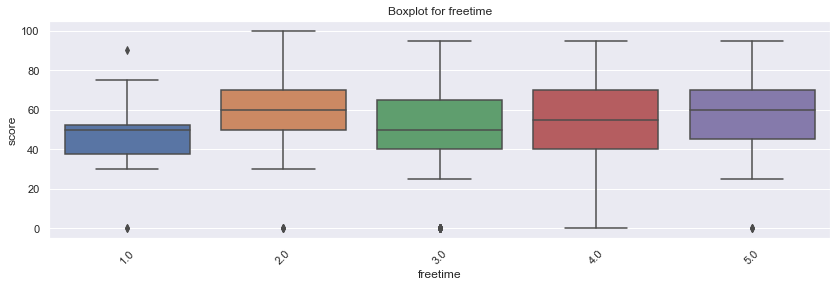

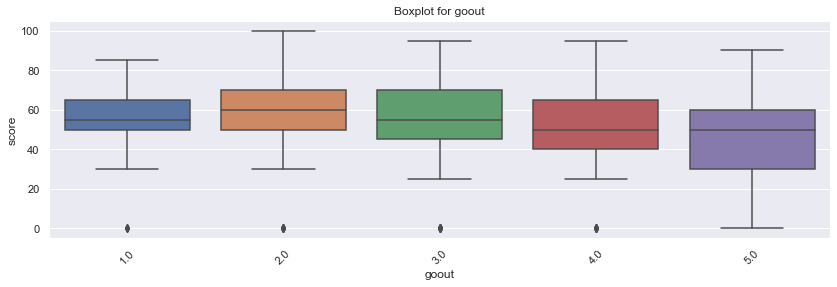

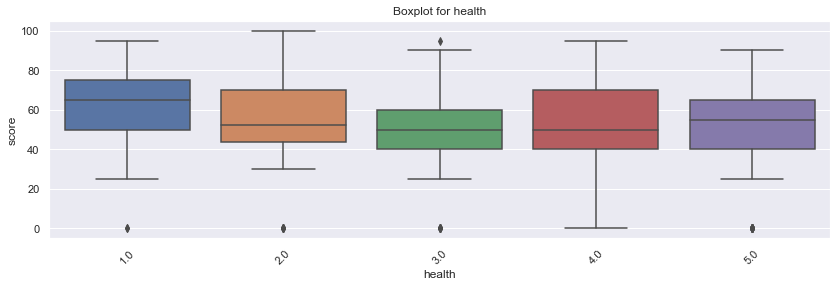

In [184]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'famsup', 'paid', 'activities', 'nursery', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'health']:
    get_boxplot(col)

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения балло по математике по различным параметрам неразличимы:

In [10]:
# Функция для проверки статистической разницы в распределении оценок по номинативным признакам
# с помощью теста Стьюдента встроенного в функцию ttest_ind()
# добавила параметр nan_policy='omit'
def get_stat_dif(column):
    # На входе имеем имя столбца с нечисловыми (номинативными) данными
    # Проверяем характер распределения оценок в зависимости от значений в этом столбце
    cols = stud.loc[:, column].value_counts().index
    # Создаём все возможные парные комбинации из элементов списка cols 
    combinations_all = list(combinations(cols, 2))
    # Для каждой пары номинативных значений рассматриваемого столбца
    # выполняем тест Стьюдента с поправкой Бонферони
    for comb in combinations_all:
        # Готовим аргументы для функции ttest_ind()
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score'], nan_policy='omit').pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [11]:
#запустила функцию get_stat_dif для необработанного вообще датасета, со всеми пропусками
#26 признаков, убрала целевую переменную score, числовые признаки age и absebse и явно лишний studytime, granular
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки goout


In [185]:
#запустила функцию get_stat_dif для датасета, в ктр заполнены все пропуски и уже удалена часть столбцов
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'famsup', 'paid', 'activities', 'nursery', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Fedu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки guardian
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки health


Оставляем для построения модели только значимые признаки

In [ ]:
stud_for_model = stud.loc[:, ['age', 'sex', 'Medu', 'Fedu', 'Mjob', 'guardian', 'romantic', 'health']]

# Основные итоги работы.


Итак, в результате EDA для анализа влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике были получены следующие выводы:

- В данных достаточно мало пустых значений, только в столбцах Pstatus, famsup, paid было примерно по 10% пропусков.
- Выбросы найдены только в столбцах с возрастом, образованием отца, семейными отношениями и количеством пропущенных занятий, то есть в 4х признаках из 29, что позволяет сделать вывод о том, что данные достаточно чистые.
- Были удалены следующие признаки из-за неинформативности и возможно некачественных данных. А именно studytime, granular (дубль studytime), failures (скрытый пропуск, большая часть значений 0), schoolsup (тоже похоже на скрытый пропуск, большая часть значений no), higher (наоборот, почти все значения yes). 
### вот в этом моменте (удалять или нет признаки если данные кажутся неинформативными) я очень сомневаюсь, задавала ментору Анне Нохриной в слак, но ответа не получила
- Отрицательная корреляция параметра age и score может говорить о том, что с возрастом пропадает желание учиться либо в таком возрате в школе учатся хронические второгодники, оценки которых традиционно низкие
- Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это age, sex, Medu, Fedu, Mjob, guardian, romantic, health

# Вопросы, которые я для себя пока не решила, дополнительный комментарий по своей работе для ментора.

## 1. как заполнять данные в пропорции, а главное надо ли?

предположила, что есть какой-то метод для заполнения пропорцией, ну чтобы распределение не портилось
например, 40% значение да, 60% значение нет и 10 штук пропусков. Вот надо и заполнить 4 пропуска значением да, 6 - значением нет
Мне показалось, что функция с вот таким параметром interpolate(method='pad') делает что-то похожее

#### но самое главное, я не увидела такого способа заполнения в статьях (да и в модулях по ML). Его можно использовать?

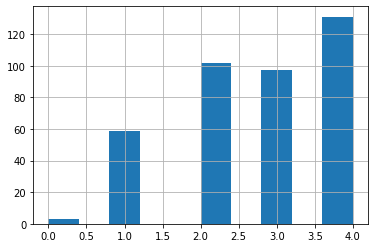

In [14]:
stud.Medu.hist()

In [16]:
stud.Medu.value_counts(dropna=False, normalize=True)

4.0    0.331646
2.0    0.258228
3.0    0.245570
1.0    0.149367
0.0    0.007595
NaN    0.007595
Name: Medu, dtype: float64

In [19]:
stud.Medu.interpolate(method='pad').value_counts(dropna=False, normalize=True)

4.0    0.334177
2.0    0.260759
3.0    0.245570
1.0    0.151899
0.0    0.007595
Name: Medu, dtype: float64

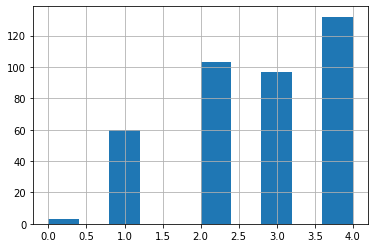

In [21]:
stud.Medu.interpolate(method='pad').hist()

## 2. Нужно ли переделывать (yes или no) в бинарные значение 0/1 в этом задании?

Как я поняла, значения типа yes или no конвертируют в бинарные 0/1 только для того, чтобы потом скормить модели, а для корреляции это бесполезно, так как для корреляции нужны данные в формате float64, а не int. Надо ли было конвертировать в этом задании? Вообще EDA подразумевает конвертацию в 0/1 или это какой-то следующий этап?

In [ ]:
#пример конвертации для колонки paid
stud.paid = stud.paid.map(dict(yes=1, no=0))

## 3. В каких случаях заполнять пропуски медианой, а в каких модой (самое часто встречающееся)? 

Для категориальных признаков (у ктр значение от 0 до 4 например) подходит stud.Medu.median() и мода, у ктр значение типа other stud.Mjob.median()- нет, соотстветственно используем моду. А какой способ лучше для каких случаев лучше? Про медиану читала в статьях, про моду писала Анна Нохрина в слаке и видела в блоке по ML

## 4. Как найти корреляцию между 2мя категориальными признаками? И нужно ли?

Как правильно заполнять пропуски, анализируя значения для этой же строки (для того же учащегося), но у других признаков (например, работа матери и образование матери) так, чтобы это не выглядело подгонкой и гаданием на кофейной гуще?

In [ ]:
# изменила score на Medu в функции, но мне кажется, что ttest только для количественных признаков, там же средняя считается.
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'Medu'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'Medu'], nan_policy='omit').pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

## 5. Как правильно использовать imputation (метод 5 из статьи от Анны)?

Я рассуждала примерно так: у людей, ктр работают в одной сфере (учитель, врач) примерно один уровень образования. То есть можно написать функцию, у которой на вход подается вид работы, а на выходе получается код образования. И потом вручную отфильтровывать датафрейм по виду работы (stud.Mjob == 'teacher') и если есть пропуски в колонке Medu подставлять через fillna() полученное из функции значение. Как такое реализовать фукнцией не придумала, наверно потому что сомневаюсь в правильности такой идеи

In [ ]:
#идею утащила у кого-то из слака
def imputation(job):
    return stud.pivot_table(index=['Mjob', 'Medu'],  values='score', aggfunc='count').loc[job].idxmax()

In [ ]:
imputation('teacher')

В датафрейме есть пропуски по образованию родителей. Чтобы заполнить пропуски в Medu я смотрю на Mjob. Смотрю моду Medu по людям с тем же типом работы и присваиваю это значение пропуску.НО! есть очень большая категория вида работ "other", там может скрываться все что угодно от IT до уборщицы. Поэтому так заменять не стала, пишу в список вопросов для разбора на созвоне (если можно, конечно)

## 6. Новый столбец score_indicator - надо ли на данном этапе?

Я добавила столбец score_indicator, ктр показывает какие значения были изначально заполнены (в том числе и 0), а какие я заполняла 0. Анна Нохрина написала, что это хорошая идея, только я не очень понимаю пока, зачем. Или это для использования на следующих этапах?

## 7. Удаление признаков из-за неинформативности данных

Были удалены следующие признаки ДО построения boxplot`ов из-за неинформативности и возможно некачественных данных. А именно studytime, granular (дубль studytime), failures (скрытый пропуск, большая часть значений 0), schoolsup (тоже похоже на скрытый пропуск, большая часть значений no), higher (наоборот, почти все значения yes). Или можно удалять только после проверки p-value?
Вот в этом моменте я очень сомневаюсь, задавала ментору Анне Нохриной в слак, но ответа не получила

## 8. Выводы по boxplot - надо ли и если да, то в каком формате?

В образце про какао не было примера, в слаке задавали такой вопрос, менторы/кураторы обещали поправить, но не поправили. Поэтому я не стала ничего выдумывать. Можно какой-то образец как это должно выглядеть. В голову приходит только такое: в среднем у мужчин более высокий балл чем у женщин, но есть отдельные выбросы у мужчин, где очень низкое значение баллов. Учащиеся, у которых нет романтических отношений получили более высокий балл, чем те, у которых такие отношения есть. 